In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf

2025-06-23 08:02:14.099911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750690934.120807  322731 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750690934.125861  322731 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750690934.143987  322731 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750690934.144018  322731 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750690934.144020  322731 computation_placer.cc:177] computation placer alr

In [2]:
# minorized reference
with h5py.File('/global/u2/k/kberard/SCGSR/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)
minorized_ref_d = (np.sum(ref_d,axis=2))
minorized_ref_d.shape



(64, 64, 64)


(64, 64)

In [3]:
####################################################################################################################################################
def stochastic_density(d,N):
    # poisson model
    #  accurate and fast for all values of N
    # N  = number of MC samples
    assert isinstance(d,np.ndarray)
    assert isinstance(N,(int,float,np.int64,np.float64))
    assert N>0
    ds = np.random.poisson(N*d)/N
    ds*= d.sum()/ds.sum()
    return ds
#end def stochastic_density

####################################################################################################################################################

In [4]:
print(ref_d.shape)
"""y_train_3d = np.zeros((5000,64,64,64))
for i in range (len(y_train_3d)):
    y_train_3d[i] =  stochastic_density(ref_d,4770000)
y_train = (np.sum(y_train_3d,axis=2))"""

x_train_3d = np.zeros((5000,64,64,64))
for i in range (int(len(x_train_3d)/5)):
    for j in range (5):     
        x_train_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_train = (np.sum(x_train_3d,axis=2))

print("train generated")

(64, 64, 64)
train generated


In [5]:
print(ref_d.shape)
"""y_val_3d = np.zeros((1000,64,64,64))
for i in range (len(y_val_3d)):
    y_val_3d[i] =  stochastic_density(ref_d,4770000)
y_val = (np.sum(y_val_3d,axis=2))"""

x_val_3d = np.zeros((1000,64,64,64))
for i in range (int(len(x_val_3d)/5)):
    for j in range (5):     
        x_val_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_val = (np.sum(x_val_3d,axis=2))
print("val generated")

(64, 64, 64)
val generated


In [6]:
#################  add more diverse set of training data and fix overfilling!!!!!!!!!!

In [7]:
print(ref_d.shape)
"""y_test_3d = np.zeros((500,64,64,64))
for i in range (len(y_test_3d)):
    y_test_3d[i] =  stochastic_density(ref_d,4770000)
y_test = (np.sum(y_test_3d,axis=2))"""
count = 0
x_test_3d = np.zeros((500,64,64,64))
for i in range (int(len(x_test_3d)/5)):
    for j in range (5):   
        count+=1
        x_test_3d[i*(j+1)] =  stochastic_density(ref_d,10000*(j+1))
x_test = (np.sum(x_test_3d,axis=2))
print("test generated")
print(count)

(64, 64, 64)
test generated
500


In [8]:
################## Test what number of samples #####################
"""y_tvt = stochastic_density(ref_d,4770000)
print(y_tvt.shape)
print("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))
print("current error is =",np.linalg.norm(ref_d-y_tvt[1]))"""

'y_tvt = stochastic_density(ref_d,4770000)\nprint(y_tvt.shape)\nprint("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))\nprint("current error is =",np.linalg.norm(ref_d-y_tvt[1]))'

In [9]:
y_test_3d = np.zeros((x_test.shape[0],64,64,64))
y_train_3d = np.zeros((x_train.shape[0],64,64,64))
y_val_3d = np.zeros((x_val.shape[0],64,64,64))
for i in range (y_test_3d.shape[0]):
    y_test_3d[i]=stochastic_density(ref_d,1000000)
y_test = (np.sum(y_test_3d,axis=2))

for i in range (y_train_3d.shape[0]):
    y_train_3d[i]=stochastic_density(ref_d,1000000)
y_train = (np.sum(y_train_3d,axis=2))

for i in range (y_val_3d.shape[0]):
    y_val_3d[i]=stochastic_density(ref_d,1000000)
y_val = (np.sum(y_val_3d,axis=2))
print("here")

here


In [10]:
print("here")

here


In [19]:
"""y_test = np.zeros((x_test.shape))
y_train = np.zeros((x_train.shape))
y_val = np.zeros((x_val.shape))
for i in range (y_test.shape[0]):
    y_test[i]=minorized_ref_d

for i in range (y_train.shape[0]):
    y_train[i]=minorized_ref_d

for i in range (y_val.shape[0]):
    y_val[i]=minorized_ref_d"""

In [11]:
# Add channel dimension
x_train = x_train[..., np.newaxis]
x_val   = x_val[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

y_train = y_train[..., np.newaxis]
y_val   = y_val[..., np.newaxis]
y_test   = y_test[..., np.newaxis]

In [12]:
import tensorflow as tf

def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)

    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)

    jsd = 0.5 * (kl_true + kl_pred)

    return tf.reduce_mean(jsd)


Epoch 1/100


2025-06-23 08:10:18.780134: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_274', 132 bytes spill stores, 132 bytes spill loads

2025-06-23 08:10:18.945920: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_274', 92 bytes spill stores, 92 bytes spill loads

2025-06-23 08:10:18.958769: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_536', 32 bytes spill stores, 32 bytes spill loads

2025-06-23 08:10:19.040919: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_536', 36 bytes spill stores, 36 bytes spill loads

2025-06-23 08:10:19.076881: I external/loc

100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0480 - val_loss: 0.0473
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0464 - val_loss: 0.0388
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313 - val_loss: 0.0102
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 8.5012e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4453e-04 - val_loss: 2.7299e-04
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3104e-04 - val_loss: 1.5890e-04
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4746e-04 - val_loss: 1.2126e-04
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1554e-04 - val_loss: 1.0141e-04
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8136e-05 - val_loss: 8.9502e-05
Epoch 12

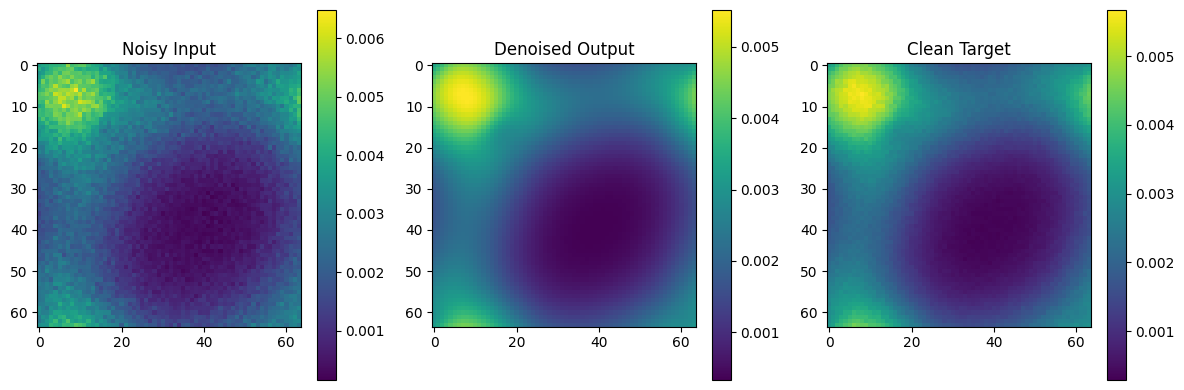

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt



# --- DAE Definition with Channel Dimension Support ---
def create_dae(input_shape):
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)
        x = x / (x_sum + 1e-8) * 8.0
        return x
    flat_dim = np.prod(input_shape)
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        
        # Encoder
        layers.Dense(16, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        

        layers.Dense(flat_dim, activation='sigmoid'),
        layers.Reshape(target_shape=input_shape),
        layers.Lambda(renormalize)
    ])
    return model

# --- Main Execution ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)


    dae = create_dae(input_shape)
    # change loss to JS div
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    dae.compile(optimizer=custom_optimizer, loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=100,
            batch_size=50,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and Evaluate ---
    i = 0
    denoised_norm = dae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm
    noisy_input = x_test[i, ..., 0]
    true_clean = y_test

    # --- Plot ---
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input, cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(true_clean[0,:,:,0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


    
    

In [20]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(x_test[0,:,:,0]-minorized_ref_d))
print(x_test[0,:,:,0].shape)
print(minorized_ref_d.shape)

Mean vs DFT 2 norm diff
0.060973487288985585
prediction of one test sample vs DFT
0.012530728097518876
(64, 64)
(64, 64)


In [21]:
# must beat the model predicting the average
test_avg = np.mean(x_test[:,:,:,0],axis=0)
print("2 norm difference")
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(dae.predict(x_test[0:0+1])[0,:,:,0]-minorized_ref_d))
print()

print("divergence difference")
mean_pred = dae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))                 
print("JSD (bar{x_test},y_dft):", jensen_shannon_divergence_loss(test_avg, minorized_ref_d.copy()))
print("JSD (DAE(bar{x}),y_dft):", jensen_shannon_divergence_loss(np.squeeze(mean_pred), minorized_ref_d.copy()))
print("JSD (DAE(_i}),y_dft):", jensen_shannon_divergence_loss(dae.predict(x_test[0:0+1])[0,:,:,0], minorized_ref_d.copy()))




2 norm difference
Mean vs DFT 2 norm diff
0.060973487288985585
prediction of one test sample vs DFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
0.00022429421054907974

divergence difference
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
JSD (bar{x_test},y_dft): tf.Tensor(1.3557116e-05, shape=(), dtype=float32)
JSD (DAE(bar{x}),y_dft): tf.Tensor(4.1026743e-07, shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
JSD (DAE(_i}),y_dft): tf.Tensor(4.4709867e-07, shape=(), dtype=float32)


In [22]:
print(x_test[0].shape)

(64, 64, 1)


In [23]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


number of electron is should = 8 8.0
